In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import cv2 as cv2
import glob as glob

train_df = pd.read_json("train.json") 
img_and_id = []
all_sample_potots = []
all_company_potots = []
i=0
for photos in glob.glob('images_sample/*/*.jpg'):
    #print(photos)
    img = Image.open(photos)
    #print(img.size, img.mode, len(img.getdata()))
    phi= photos.split("/")
    ph_listing_id = int(phi[1] )
    img_and_id = [ph_listing_id, img]
   # print(img_and_id)
    all_sample_potots.append(img_and_id)
    i=i+1
print(type(img))    
for com_photos in glob.glob('matchCompany/*'):
    com_img = Image.open(com_photos)
    print(com_photos)
    phi= com_photos.split("/")
    ph_companyNmae = (phi[1].split('.'))[0]
    companyName_and_companyImg = [ph_companyNmae, com_img]
    companyName_and_Number = [ph_companyNmae, 0]
    all_company_potots.append(companyName_and_companyImg)
all_company_potots

<class 'PIL.JpegImagePlugin.JpegImageFile'>
matchCompany/BOLD.png
matchCompany/Caliber.png
matchCompany/Manhattan Reality.jpeg
matchCompany/EXR.png
matchCompany/CITI HABITATS.png
matchCompany/BOND.png
matchCompany/HILLEL.jpg


[['BOLD',
  <PIL.PngImagePlugin.PngImageFile image mode=P size=224x225 at 0x14BBD6390>],
 ['Caliber',
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=121x43 at 0x14BBD6310>],
 ['Manhattan Reality',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x14BBD59D0>],
 ['EXR',
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=198x214 at 0x14BC0EB90>],
 ['CITI HABITATS',
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=157x32 at 0x14BBD6090>],
 ['BOND',
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=59x52 at 0x14BBD5650>],
 ['HILLEL',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x14BBD5350>]]

In [2]:
dfObj_all_sample_potots = pd.DataFrame(all_sample_potots,columns = ['Id' , 'PIL_Image'])
dfObj_all_sample_potots

,Id,PIL_Image
0,6812051,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,6812051,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,6812051,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,6812051,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,6812263,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...
409,6812012,<PIL.JpegImagePlugin.JpegImageFile image mode=...
410,6812216,<PIL.JpegImagePlugin.JpegImageFile image mode=...
411,6812216,<PIL.JpegImagePlugin.JpegImageFile image mode=...
412,6812216,<PIL.JpegImagePlugin.JpegImageFile image mode=...


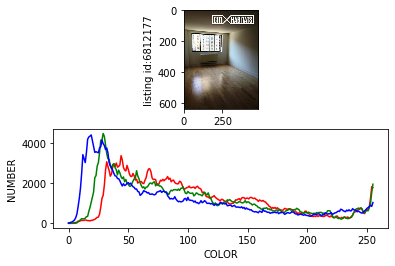

<Figure size 7200x720 with 0 Axes>

In [5]:
Sample_Number = 100
Sample_Photo = all_sample_potots[Sample_Number][1]

fig, (ax1, ax2) = plt.subplots(2)
fig= plt.figure(figsize=(100,10))
imgplot = ax1.imshow(Sample_Photo)
ax1.set_ylabel('listing id:'+ str(all_sample_potots[Sample_Number][0]))
r, g, b = Sample_Photo.split() 
histogram = [r.histogram(),g.histogram(),b.histogram()]
ax2.plot(histogram[0],'r');
ax2.plot(histogram[1],'g');
ax2.plot(histogram[2],'b'); 
ax2.set_xlabel('COLOR')
ax2.set_ylabel('NUMBER')
plt.show()


<class 'PIL.JpegImagePlugin.JpegImageFile'>


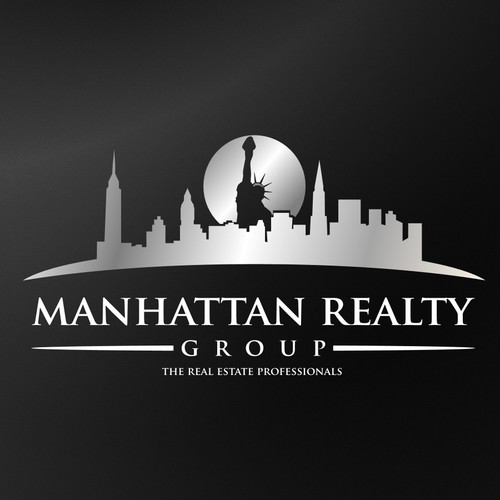

In [12]:
#sample water mark
img1 = all_company_potots[2][1]
print(type(img1))
img1

In [7]:
dfObj_all_company_potots= pd.DataFrame(all_company_potots,columns = ['Company Name' , 'PIL_Image'])
dfObj_all_company_potots['Numbers']= 0
dfObj_all_company_potots

,Company Name,PIL_Image,Numbers
0,BOLD,<PIL.PngImagePlugin.PngImageFile image mode=P ...,0
1,Caliber,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0
2,Manhattan Reality,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
3,EXR,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0
4,CITI HABITATS,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0
5,BOND,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0
6,HILLEL,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0


In [9]:
#all_company_potots
#all_sample_potots  

all_photoId_to_companyName = []
for photo_num in range(0, len(all_sample_potots)):
    for com_num in range(0, len(all_company_potots)):
        img1 = np.asarray(all_company_potots[com_num][1] )     # queryImage
        img2 = np.asarray(all_sample_potots[photo_num][1]) # trainImage
        # Initiate SIFT detector
        sift = cv2.xfeatures2d.SIFT_create()
        # find the keypoints and descriptors with SIFT
        kp1, des1 = sift.detectAndCompute(img1,None)
        kp2, des2 = sift.detectAndCompute(img2,None)
        FLANN_INDEX_KDTREE = 0
        index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
        search_params = dict(checks = 50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(des1,des2,k=2)
        # store all the good matches as per Lowe's ratio test.
        good = []
        for m,n in matches:
            if m.distance < 0.7*n.distance:
                good.append(m)
        #print("good = ", good)
        if len(good)>10:
            photoId_to_companyName = [all_sample_potots[photo_num][0],all_company_potots[com_num][0]]
            all_photoId_to_companyName.append(photoId_to_companyName) 
            previous=(dfObj_all_company_potots.loc[ dfObj_all_company_potots['Company Name'] == all_company_potots[com_num][0], 'Numbers'].iloc[0])
            current = previous+1
            dfObj_all_company_potots.loc[ dfObj_all_company_potots['Company Name'] == all_company_potots[com_num][0], 'Numbers'] = current
            break
print("_________________________________/nfinish/n_____________________________________")
print(all_photoId_to_companyName)

_________________________________/nfinish/n_____________________________________
[[6812051, 'CITI HABITATS'], [6812051, 'CITI HABITATS'], [6812051, 'CITI HABITATS'], [6812051, 'CITI HABITATS'], [6812263, 'CITI HABITATS'], [6812263, 'CITI HABITATS'], [6812263, 'CITI HABITATS'], [6812263, 'CITI HABITATS'], [6812263, 'CITI HABITATS'], [6812263, 'CITI HABITATS'], [6812264, 'CITI HABITATS'], [6812264, 'CITI HABITATS'], [6812201, 'CITI HABITATS'], [6812201, 'CITI HABITATS'], [6812201, 'Manhattan Reality'], [6812201, 'CITI HABITATS'], [6812033, 'CITI HABITATS'], [6812239, 'CITI HABITATS'], [6812239, 'Manhattan Reality'], [6812239, 'CITI HABITATS'], [6812050, 'CITI HABITATS'], [6812050, 'CITI HABITATS'], [6812050, 'CITI HABITATS'], [6812050, 'CITI HABITATS'], [6812061, 'CITI HABITATS'], [6812061, 'CITI HABITATS'], [6812061, 'CITI HABITATS'], [6812061, 'CITI HABITATS'], [6812061, 'CITI HABITATS'], [6812061, 'Manhattan Reality'], [6812061, 'CITI HABITATS'], [6812061, 'CITI HABITATS'], [6812061, 

In [10]:
dfObj_all_company_potots

,Company Name,PIL_Image,Numbers
0,BOLD,<PIL.PngImagePlugin.PngImageFile image mode=P ...,0
1,Caliber,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0
2,Manhattan Reality,<PIL.JpegImagePlugin.JpegImageFile image mode=...,75
3,EXR,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0
4,CITI HABITATS,<PIL.PngImagePlugin.PngImageFile image mode=RG...,235
5,BOND,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0
6,HILLEL,<PIL.JpegImagePlugin.JpegImageFile image mode=...,15


In [13]:
dfObj_all_photoId_to_companyName= pd.DataFrame(all_photoId_to_companyName,columns = ['Photo Id','Company Name' ])
dfObj_all_photoId_to_companyName

,Photo Id,Company Name
0,6812051,CITI HABITATS
1,6812051,CITI HABITATS
2,6812051,CITI HABITATS
3,6812051,CITI HABITATS
4,6812263,CITI HABITATS
...,...,...
320,6812012,CITI HABITATS
321,6812216,CITI HABITATS
322,6812216,CITI HABITATS
323,6812216,CITI HABITATS
